# Regularised Least squares with Polynomial Basis 

In this exercise we cover how to regularise least squares model using sklearn. In particular, you will use the pipeline mechanism in order to apply the regularisation method that we covered in the material (aka Ridge regularisation)

**Learning Outcomes**
1. use the make_pipeline in sklearn to create more complex model out of simpler models
2. use the polynomial basis in sklearn
3. see the effect of increasing the polynomial degree on overfitting and underfitting
4. examine the effect of changing the regularisation constant $\lambda$ on the fitted model


## Preliminary

### Converting 1D array into 2D array in numpy

In [1]:
%matplotlib inline
import numpy as np

It is useful to know about the newaxis of numpy, it is used also to convert a row array into vector.

In [2]:
X = np.sort([1,5,8,2])

print(X)
print(X[:, np.newaxis])

[1 2 5 8]
[[1]
 [2]
 [5]
 [8]]


Also it is useful to know about the .c_ in numpy. It is used also to convert a row array into vector

In [3]:
X = np.sort([1,5,8,2])

print(X)
print(np.c_[X])

[1 2 5 8]
[[1]
 [2]
 [5]
 [8]]


The above two funcitonality can be sued when we generate a 1D data (one feature) with the fit funciton which expects 2D data(assuming multiple features)

## Regularised Linear Regression with Polynomial Basis using Least squares

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In the following example, we use ridge with polynomial linear regression to create a regularised linear regression with polynomial basis. Read a bit about pipelines in sklearn [here](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)

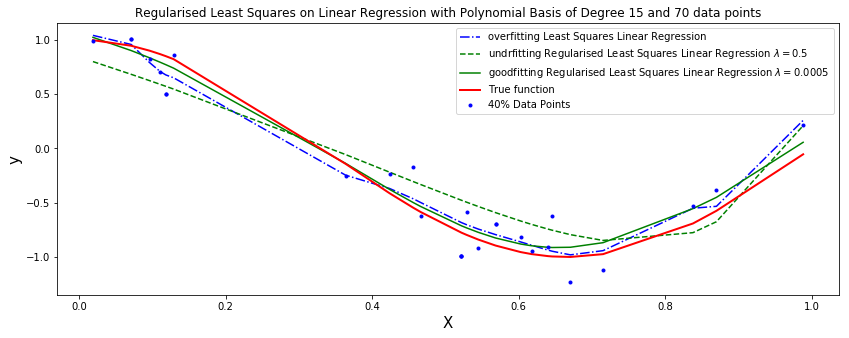

In [10]:

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n = 70
#n = 500 # try this one to see the effect


X = np.sort(np.random.rand(n))
y = true_fun(X) + np.random.randn(n) * 0.2

# select a subset of (X,y) pairs
perc = 40
idx = np.sort(np.random.randint(n, size=int(perc*n/100)))
X_tst = X[idx]
y_tst = y[idx]

degree = 15
lambda_1 = 0.5 # 0.0005
lambda_2 = 0.0005 # 0.0005
reg1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # overfitting linear regression
reg2 = make_pipeline(PolynomialFeatures(degree), Ridge(lambda_1))   # underfitting regularised linear regression
reg3 = make_pipeline(PolynomialFeatures(degree), Ridge(lambda_2))   # good fitting regularised linear regression

reg1.fit(X[:, np.newaxis], y)
reg2.fit(X[:, np.newaxis], y)
reg3.fit(X[:, np.newaxis], y)

plt.figure(figsize=(14, 5))
plt.plot(X_tst, reg1.predict(X_tst[:, np.newaxis]),'-.b', label='overfitting Least Squares Linear Regression')
plt.plot(X_tst, reg2.predict(X_tst[:, np.newaxis]),'--g',  label='undrfitting Regularised Least Squares Linear Regression $\lambda={}$'.format(lambda_1))
plt.plot(X_tst, reg3.predict(X_tst[:, np.newaxis]),'-g',  label='goodfitting Regularised Least Squares Linear Regression $\lambda={}$'.format(lambda_2))

plt.plot(X_tst, true_fun(X_tst),                   '-r',  label='True function', linewidth=2)
plt.plot(X_tst, y_tst,                   '.b',  label='{}% Data Points'.format(perc), linewidth=2)

plt.title('Regularised Least Squares on Linear Regression with Polynomial Basis of Degree {} and {} data points'.format(degree,n))
# plt.xlim(0, 2)
# plt.ylim((0, 1.6))
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.savefig('figures/RegularisedOverfittingRegression'+str(n)+'.png')

As we can see the lower degree polynomial were incapable of capturing the signal while higher polynomial basis are better in this case. Note that we have few training points.

Increasing the number of data points is likely to change the less complex model's capabilities and will allow them to be competitive with more complex model. This is an important concept where more data compensate and in fact is better suits less complex models.

This also explains the dominance of the services of big high tech companies who simply has more data than anyone else (Google for example). Their data guarantees better services.


## Your Turn

Ok now try do the same but for a stochastic gradient descent instead of least squares

In [11]:
# write your code here....






Try to implelemnt a grid search method to selelct lambda

In [12]:
# write your code here....



